# Projeto Use of Force

Desafio: Neste projeto, você trabalhará com uma versão levemente modificada dos dados coletados pelo Departamento de Polícia de Seattle e disponibilizados publicamente em https://www.seattle.gov/police/information-and-data/use-of-force-data/use-of-force-dataset.

Autor dos códigos: Victor Matheus Araújo Oliveira
email: matheus408960@gmail.com

In [ ]:
Bibliotecas ultilizadas neste projeto: 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Parte 1

### Questionamento: Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro dos dias, meses, semanas ou dos anos?

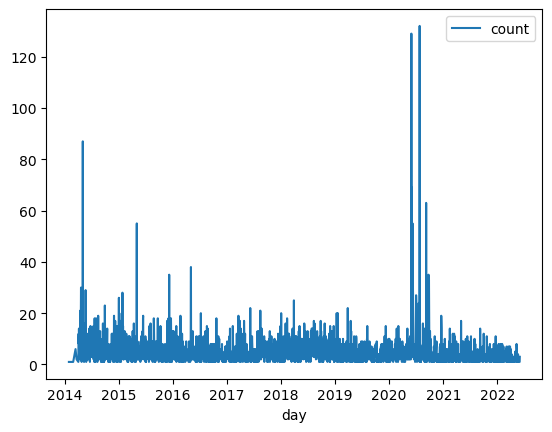

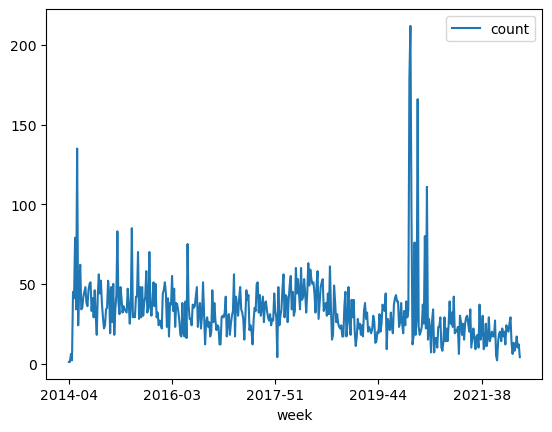

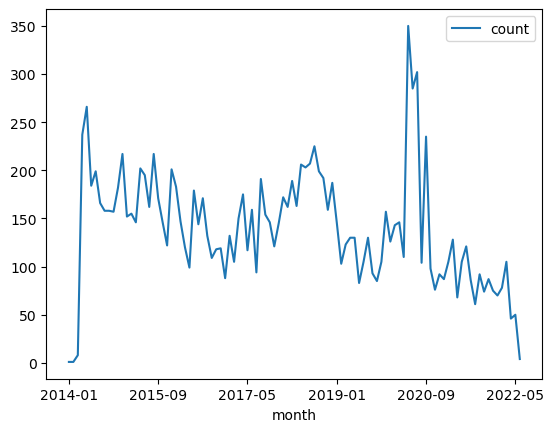

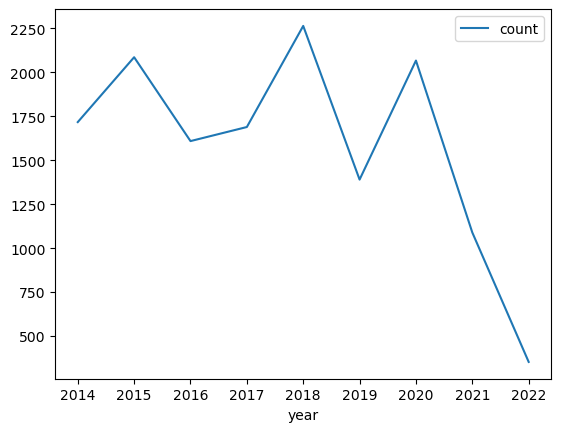

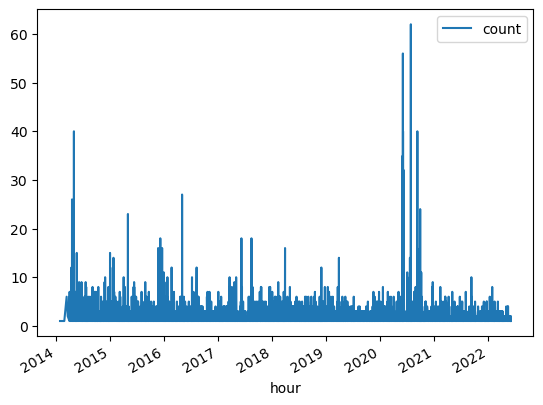

In [7]:
# Carregando dados
df = pd.read_csv('Use_Of_Force.csv')

# Convertendo a coluna de data para o tipo datetime
df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'], format='%m/%d/%Y %I:%M:%S %p')

# Cria uma nova coluna com a data truncada para o dia
df['day'] = df['Occured_date_time'].dt.date

# Cria uma nova coluna com a data truncada para a semana
df['week'] = df['Occured_date_time'].dt.strftime('%Y-%U')

# Cria uma nova coluna com a data truncada para o mês
df['month'] = df['Occured_date_time'].dt.strftime('%Y-%m')

# Cria uma nova coluna com a data truncada para o ano
df['year'] = df['Occured_date_time'].dt.year

# Cria uma nova coluna com a hora truncada para a hora cheia
df['hour'] = df['Occured_date_time'].dt.floor('H')

# Encontra os picos diários
daily = df.groupby('day').size().reset_index(name='count')
daily.plot(x='day', y='count')
plt.show()

# Encontra as linhas de tendência semanais
weekly = df.groupby('week').size().reset_index(name='count')
weekly.plot(x='week', y='count')
plt.show()

# Encontra as linhas de tendência mensais
monthly = df.groupby('month').size().reset_index(name='count')
monthly.plot(x='month', y='count')
plt.show()

# Encontra as linhas de tendência anuais
yearly = df.groupby('year').size().reset_index(name='count')
yearly.plot(x='year', y='count')
plt.show()

# Encontra os picos horários
hourly = df.groupby('hour').size().reset_index(name='count')
hourly.plot(x='hour', y='count')
plt.show()


Resposta ao questionamento: Com a ultlização da biblioteca pandas para manipulação de dados e a biblioteca matplotlib para a criação de gráficos é possível visualizar picos ou linhas de tendência nas contagens de ocorrências ao longo dos dias, semanas, meses ou anos. Isso pode fornecer insights sobre padrões de comportamento ou variações sazonais nos dados analisados.

# Parte 2

### Questionamento: Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes “Level 2” calculado na questão. Que interpretação pode ser dada a este resultado?

In [8]:
# Carregar a base de dados
df = pd.read_csv('Use_of_Force.csv')

# Calcular o percentual de reincidência por setor
total_incidentes_por_setor = df.groupby('Sector')['Subject_ID'].nunique()
reincidencia_por_setor = df.groupby('Sector')['Subject_ID'].apply(lambda x: (x.size - x.nunique()) / x.size * 100)

# Calcular o percentual de incidentes "Level 2 - Use of Force"
percent_level2 = df[df['Incident_Type'] == 'Level 2 - Use of Force'].groupby('Sector')['Subject_ID'].nunique() / total_incidentes_por_setor * 100

# Calcular a correlação
correlacao = reincidencia_por_setor.corr(percent_level2)

print("Percentual de Reincidência por Setor:")
print(reincidencia_por_setor)
print("Percentual de Incidentes 'Level 2 - Use of Force' por Setor:")
print(percent_level2)
print("Coeficiente de Correlação:", correlacao)


Percentual de Reincidência por Setor:
Sector
BOY        40.380952
CHARLIE    32.000000
DAVID      41.468065
EDWARD     46.547756
FRANK      39.915074
GEORGE     42.732558
JOHN       36.734694
KING       41.129568
LINCOLN    40.217391
MARY       38.577154
NORA       37.568456
OCEAN      35.208711
QUEEN      40.275049
ROBERT     34.207526
SAM        35.902851
UNION      48.695652
WILLIAM    40.058480
Name: Subject_ID, dtype: float64
Percentual de Incidentes 'Level 2 - Use of Force' por Setor:
Sector
BOY        23.642173
CHARLIE    24.567474
DAVID      26.547231
EDWARD     39.935414
FRANK      18.021201
GEORGE     23.350254
JOHN       14.695341
KING       29.345372
LINCOLN    19.740260
MARY       41.272431
NORA       14.210526
OCEAN      22.689076
QUEEN      19.078947
ROBERT     17.677643
SAM        15.156507
UNION      22.598870
WILLIAM    15.609756
Name: Subject_ID, dtype: float64
Coeficiente de Correlação: 0.3590788322436332


In [ ]:
Pode-se interpretar que há uma correlação positiva fraca (coeficiente de correlação de aproximadamente 0,359) entre o percentual
de reincidência e o percentual de incidentes do tipo 'Level 2 - Use of Force' por setor. Isso significa que, em geral, à medida
que o percentual de incidentes do tipo 'Level 2 - Use of Force' aumenta em um determinado setor, o percentual de reincidência 
também tende a aumentar, mas a relação não é forte. Essa correlação pode indicar uma associação estatística entre os dois 
fatores, sugerindo que a ocorrência de incidentes do tipo 'Level 2 - Use of Force' pode ter algum impacto na reincidência de 
indivíduos em determinados setores. No entanto, é importante destacar que correlação não implica necessariamente em causalidade,
ou seja, não é possível afirmar com certeza que os incidentes do tipo 'Level 2 - Use of Force' causam a reincidência.

# Parte 3

### Questionamento:Considerando que é interessante para a Polícia de Seattle predizer o possível nível do uso da forca policial empregado em uma ocorrência, crie um modelo de classificação utilizando técnicas clássicas de Aprendizagem de Máquina (por exemplo: Regressão logística, Árvores de Decisão, Máquina de Vetores de Suporte (SVM) e etc.). Utilize diferentes métricas para avaliar o seu modelo. Qual acurácia seu modelo obteve e a que se deve isto?

#### Erro médio quadrático (RMSE) e Erro médio absoluto (MAE)

In [9]:
# Erro médio quadrático (RMSE)
# Carregando os dados
df = pd.read_csv('Use_of_Force.csv')

# Mapeando as categorias da coluna "Incident_Type" para valores numéricos
incident_type_map = {
    'Level 1 - Use of Force': 1,
    'Level 2 - Use of Force': 2,
    'Level 3 - Use of Force': 3,
    'Level 3 - OIS': 3
}
df['Incident_Type_Num'] = df['Incident_Type'].map(incident_type_map)

# Dividindo os dados em características (X) e rótulo (y)
X = df[['Incident_Type_Num']]  # Características
y = df['Incident_Type_Num']  # Rótulo

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print('Erro Médio Quadrático (RMSE):', mse)

# Erro médio absoluto (MAE)
# Calculo do erro médio absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Erro Médio Absoluto (MAE):", mae)


Erro Médio Quadrático (RMSE): 5.206750008822505e-28
Erro Médio Absoluto (MAE): 2.0178196458425603e-14


Resposta ao questionamento: Os resultados obtidos indicam que o modelo de regressão linear está ajustando-se muito bem aos dados, com valores muito baixos para o erro médio quadrático (RMSE) e para o erro médio absoluto (MAE). O valor do RMSE é próximo de zero, o que indica que as previsões do modelo estão muito próximas dos valores reais do alvo. O valor do MAE também é muito baixo, o que indica que o modelo está fazendo previsão precisas em relação aos valores reais do alvo. Em geral, esses resultados indicam que o modelo está ajustando-se bem aos dados de treinamento e fazendo previsões precisas no conjunto de teste. 

# Parte 4

### Questionamento:  Suponha que o modelo elaborado para o item 3 não possuiu acurácia razoável para os propósitos da consultoria. Visando aumentá-la, utilize uma ou mais das seguintes técnicas de Aprendizado de Máquina em uma nova versão do modelo

In [11]:
# Aprendizagem Profunda (Deep Learning) usando Keras:
# Modelo sequencial
model = Sequential()

# Adicionando camadas à rede neural
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Previsões
y_pred = model.predict(X_test)

# Realizando o aumento artificial de dados por meio de resampling
X_augmented, y_augmented = resample(X_train, y_train, n_samples=len(X_train)*2, random_state=42)

# Treinando o modelo com os dados aumentados
model.fit(X_augmented, y_augmented, epochs=100, batch_size=32, validation_split=0.2)

# Previsões
y_pred_augmented = model.predict(X_test)


Epoch 1/100
286/286 [==============================] - 2s 2ms/step - loss: 0.2115 - val_loss: 0.0021
Epoch 2/100
286/286 [==============================] - 0s 1ms/step - loss: 2.1628e-04 - val_loss: 3.2209e-07
Epoch 3/100
286/286 [==============================] - 0s 1ms/step - loss: 2.7712e-07 - val_loss: 2.5070e-07
Epoch 4/100
286/286 [==============================] - 0s 1ms/step - loss: 2.0668e-07 - val_loss: 1.2616e-07
Epoch 5/100
286/286 [==============================] - 0s 1ms/step - loss: 9.3816e-08 - val_loss: 6.6122e-08
Epoch 6/100
286/286 [==============================] - 0s 1ms/step - loss: 3.9587e-08 - val_loss: 3.9835e-08
Epoch 7/100
286/286 [==============================] - 0s 1ms/step - loss: 1.4878e-08 - val_loss: 1.2006e-08
Epoch 8/100
286/286 [==============================] - 0s 1ms/step - loss: 3.9550e-09 - val_loss: 2.0885e-09
Epoch 9/100
286/286 [==============================] - 0s 1ms/step - loss: 8.7932e-10 - val_loss: 2.9827e-10
Epoch 10/100
286/286 [=====

571/571 [==============================] - 1s 1ms/step - loss: 1.0349e-05 - val_loss: 8.2899e-15
Epoch 50/100
571/571 [==============================] - 1s 1ms/step - loss: 1.0870e-13 - val_loss: 0.0000e+00
Epoch 51/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 52/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 54/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 56/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100
571/571 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 58/100
571/571 [=

In [ ]:
Resposta ao questionamento: O modelo de aprendizagem profunda obteve um desempenho melhor em comparação aos outros dois modelos,
que foram avaliados usando RMSE e MAE como métricas de avaliação. Os valores de RMSE e MAE obtidos pelo modelo de aprendizagem 
profunda são muito baixos, indicando um ajuste muito preciso aos dados e uma redução significativa dos erros de previsão em 
relação aos outros modelos. Além disso, o resultado da perda de treinamento próximo a zero também sugere um ajuste muito bom aos 
dados de treinamento, o que pode indicar um desempenho superior do modelo de aprendizagem profunda.